# Results of Siamese training

Lets begin with some plots:
1. Loss per iteration
2. Training and Validation accuracy per epoch

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f = open('op2.txt') # this is the slurm output file stripped of all the stuff that tensorflow prints
A = f.readlines()
f.close()

A = [l.strip('\n') for l in A]

loss = []
tr_a = []
val_a = []

Q = []
R = []
for i in range(len(A)):
	if 'epoch' in A[i]:
		Q.append(A[i])
	else:
		R.append(A[i])

for i in range(len(R)):
	#print R[i]
	_,sep,Vals = R[i].rpartition('loss ')
	vals,_,tr_val = Vals.partition(' ')
	tr,_,val = tr_val.rpartition(' ')
	#print vals
	loss.append(float(vals))
	#tr_a.append(float(tr))
	#val_a.append(float(val))

tr_a = []
val_a = []
for i in range(len(Q)):
	_,sep,t_a = Q[i].rpartition('training: ')
	t_a,_,_ = t_a.partition(' ')
	_,sep,v_a = Q[i].rpartition('validation: ')
	tr_a.append(float(t_a))
	val_a.append(float(v_a))

### Plotting (results for C = 10 and learning rate = 0.0001)
1. loss
2. training and validation accuracy

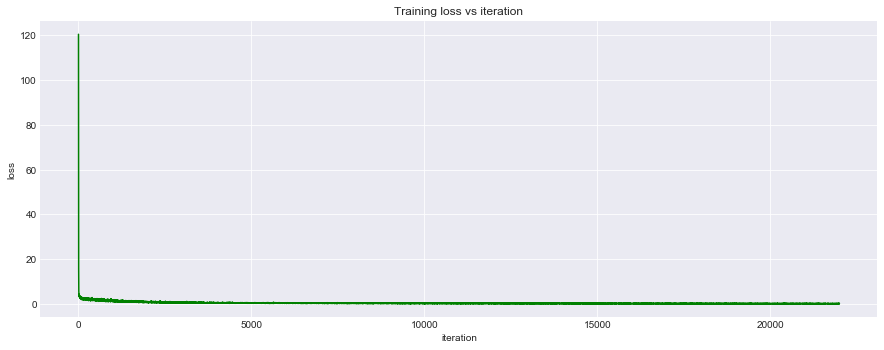

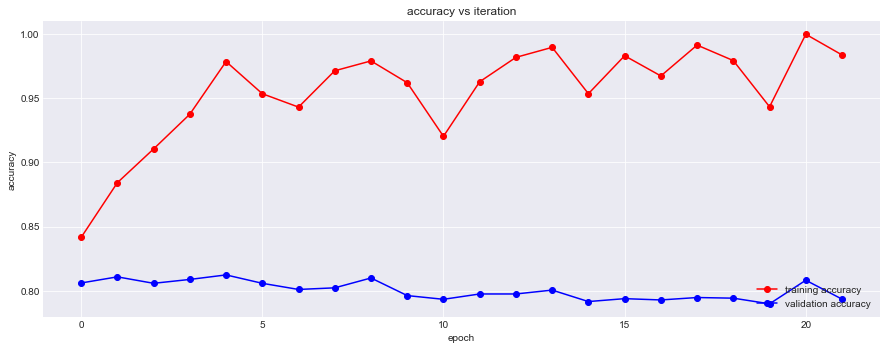

In [25]:
plt.subplot(2, 1, 1)

sns.set_style("darkgrid")
#sns.distplot(loss, color='g')
plt.plot(loss, color='g', label='loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Training loss vs iteration')
plt.gcf().set_size_inches(15, 12)
plt.show()

plt.subplot(2, 1, 2)
#sns.set_style("darkgrid")
plt.plot(tr_a, '-o', color='r', label='training accuracy')
plt.plot(val_a, '-o', color='b', label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs iteration')
plt.gcf().set_size_inches(15, 12)
plt.show()

### Plotting (results for C = 20 and learning rate = 0.0001)
1. loss
2. training and validation accuracy

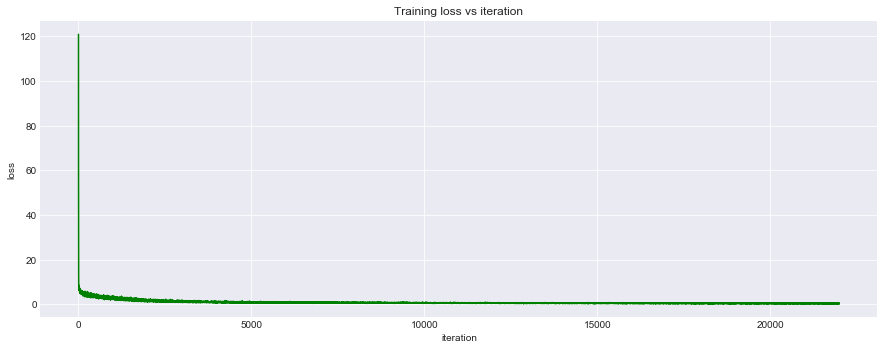

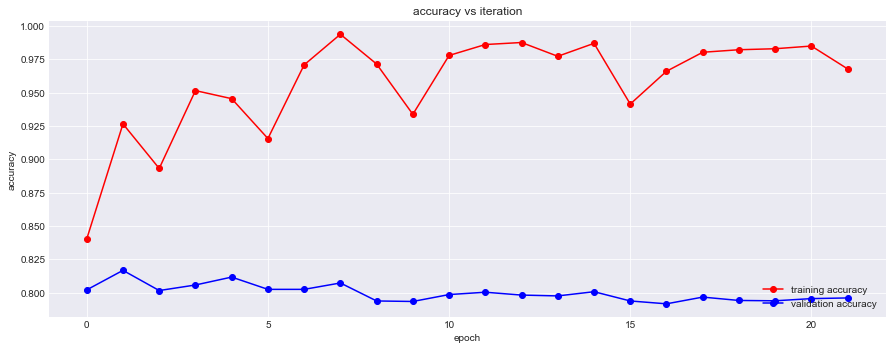

In [29]:
plt.subplot(2, 1, 1)

sns.set_style("darkgrid")
#sns.distplot(loss, color='g')
plt.plot(loss, color='g', label='loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Training loss vs iteration')
plt.gcf().set_size_inches(15, 12)
plt.show()

plt.subplot(2, 1, 2)
#sns.set_style("darkgrid")
plt.plot(tr_a, '-o', color='r', label='training accuracy')
plt.plot(val_a, '-o', color='b', label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs iteration')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Now lets check some examples

Problem statement: *Given an image and a list of words find which matches best*
   
To do this we need to first load the trained network. Since this is just the beginning we will be testing on more than one models. First lets build our stuff up and see if it works at all. Then we may think of refining it. Seems like training model is pretty well overfit.

In [1]:
# import stuff
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import system things
import tensorflow as tf
import numpy as np
import os
import pickle
from util import get_test_results
import cv2
import matplotlib.pyplot as plt

from data_generator_for_siamese import ImageDataGenerator
from datetime import datetime

from helper import get_dataset
import siamese
import glob
import re

In [2]:
# restore the model we wanty to test with
batch_size = 1
sess = tf.InteractiveSession()
siamese_model = siamese.siamese_network(batch_size)
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

# load the model
saver.restore(sess, './trained_models/C10LR0001/siamese_with_more_fonts10.ckpt')



Adding Data Augmentation
Adding Data Augmentation
INFO:tensorflow:Restoring parameters from ./trained_models/C10LR0001/siamese_with_more_fonts10.ckpt


In [34]:
# left images filenames
left_files = glob.glob('./small_sample_test/original/*')
right_files = glob.glob('./small_sample_test/right_images/*')

#f = open('./small_sample_test/txt_file/words.txt')
#word_list = f.readlines()
#f.close()

#test_words = [l.strip('\n') for l in word_list]

left_id = np.random.randint(len(left_files))

Original Image


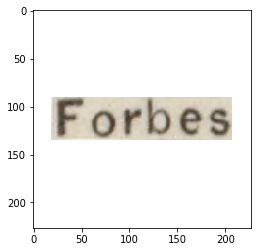

Top 5 synthetic images are


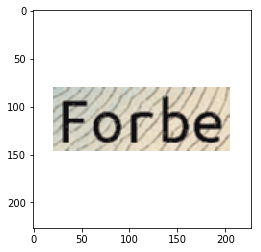

Distance: 0.184523329139


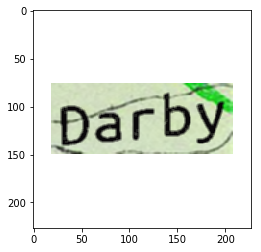

Distance: 0.823435664177


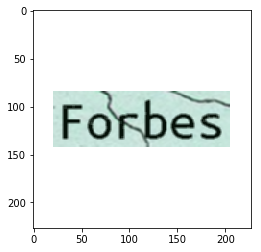

Distance: 4.12065172195


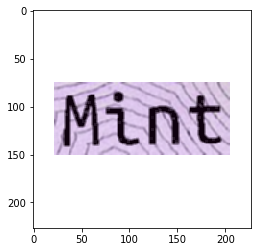

Distance: 4.66796302795


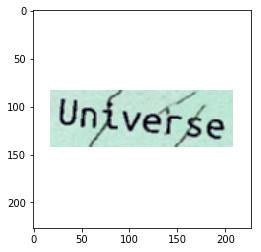

Distance: 5.18249464035


In [36]:
from scipy.spatial import distance
LI = []
LI.append(cv2.imread(left_files[left_id]))
#left_ids_available = range()
dis_vals = []
for filename in right_files:
    RI = []
    RI.append(cv2.imread(filename))
    result_vectors_left = siamese_model.o1.eval({siamese_model.x1: LI})
    result_vectors_right = siamese_model.o1.eval({siamese_model.x1: RI})
    #print(result_vectors_right.shape)
    #result = get_test_results(test_words, result_vectors)
    #print(len(result))
    dis_vals.append(distance.euclidean(result_vectors_left,result_vectors_right))
    #print("Original Image")
    #plt.imshow(LI[0])
    #plt.show()
    #print("Synthetic Image")
    #plt.imshow(RI[0])
    #plt.show()
    #print("Distance:", d)
# rank top 5
dis_vals = np.array(dis_vals)
qualified_ids = dis_vals.argsort()[0:5]
print("Original Image")
plt.imshow(LI[0])
plt.show()
print("Top 5 synthetic images are")
for i in qualified_ids:
    plt.imshow(cv2.imread(right_files[i]))
    plt.show()
    print("Distance:", dis_vals[i])
pass